In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

#Load Dataset
df=pd.read_csv(r'C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\optiSecure\OptiSecure_RS\dataCleaning\df.csv', parse_dates=['claimDate','renewalDate', 'issuanceDate', 'expiryDate','interactionDate'])



## Preliminary Data Cleaning

In [2]:
#quick overview of dataset
print(df.head(5))



    age gender   income       location maritalStatus  \
0  34.0   Male  56462.5    Port Krista      Divorced   
1  34.0   Male  56462.5    Port Krista      Divorced   
2  34.0   Male  56462.5    Port Krista      Divorced   
3  34.0   Male  56462.5    Port Krista      Divorced   
4  31.0    NaN  32839.4  South Lisaton           NaN   

                                       policyHistory  \
0  Wear level hold century often. Wait same first...   
1  Wear level hold century often. Wait same first...   
2  Wear level hold century often. Wait same first...   
3  Wear level hold century often. Wait same first...   
4  According share well affect sea. Specific noti...   

                                        claimHistory  claimamount claimType  \
0  Its media single street you. Law party busines...     1048.770    Health   
1  Its media single street you. Law party busines...     1048.770    Health   
2  Its media single street you. Law party busines...      539.576    Health   
3  Its med

In [3]:
#structure of dataset
print(f'Rows:{df.shape[0]}, Columns: {df.shape[1]}')



Rows:8031, Columns: 21


In [4]:
print(df.dtypes)

age                       float64
gender                     object
income                    float64
location                   object
maritalStatus              object
policyHistory              object
claimHistory               object
claimamount               float64
claimType                  object
claimDate          datetime64[ns]
renewalDate        datetime64[ns]
renewalStatus              object
renewalPremium            float64
policyType                 object
premium                   float64
coverageDetails            object
issuanceDate       datetime64[ns]
expiryDate         datetime64[ns]
interactionType            object
interactionDate    datetime64[ns]
responseTime              float64
dtype: object


In [5]:
#Summary of dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8031 entries, 0 to 8030
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   age              4131 non-null   float64       
 1   gender           5513 non-null   object        
 2   income           4181 non-null   float64       
 3   location         7231 non-null   object        
 4   maritalStatus    6001 non-null   object        
 5   policyHistory    7166 non-null   object        
 6   claimHistory     7302 non-null   object        
 7   claimamount      7011 non-null   float64       
 8   claimType        7011 non-null   object        
 9   claimDate        7011 non-null   datetime64[ns]
 10  renewalDate      8031 non-null   datetime64[ns]
 11  renewalStatus    5869 non-null   object        
 12  renewalPremium   7269 non-null   float64       
 13  policyType       8031 non-null   object        
 14  premium          8031 non-null   float64

In [6]:
dateCols = ['claimDate','renewalDate', 'issuanceDate', 'expiryDate','interactionDate']
for col in dateCols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
df

,age,gender,income,location,maritalStatus,policyHistory,claimHistory,claimamount,claimType,claimDate,renewalDate,renewalStatus,renewalPremium,policyType,premium,coverageDetails,issuanceDate,expiryDate,interactionType,interactionDate,responseTime
0,34.0,Male,56462.5,Port Krista,Divorced,Wear level hold century often. Wait same first...,Its media single street you. Law party busines...,1048.770,Health,2025-05-23,2025-03-11,Pending,738.443,Health,561.731,Measure yard thought room start himself. Why t...,2023-12-05,2021-04-25,Website,2025-01-05,NaN
1,34.0,Male,56462.5,Port Krista,Divorced,Wear level hold century often. Wait same first...,Its media single street you. Law party busines...,1048.770,Health,2025-05-23,2025-03-11,Pending,738.443,Health,561.731,Measure yard thought room start himself. Why t...,2023-12-05,2021-04-25,Call Center,2025-07-10,NaN
2,34.0,Male,56462.5,Port Krista,Divorced,Wear level hold century often. Wait same first...,Its media single street you. Law party busines...,539.576,Health,2025-02-07,2025-03-11,Pending,738.443,Health,561.731,Measure yard thought room start himself. Why t...,2023-12-05,2021-04-25,Website,2025-01-05,NaN
3,34.0,Male,56462.5,Port Krista,Divorced,Wear level hold century often. Wait same first...,Its media single street you. Law party busines...,539.576,Health,2025-02-07,2025-03-11,Pending,738.443,Health,561.731,Measure yard thought room start himself. Why t...,2023-12-05,2021-04-25,Call Center,2025-07-10,NaN
4,31.0,NaN,32839.4,South Lisaton,NaN,According share well affect sea. Specific noti...,Key agency case serious. Indeed offer alone ar...,965.311,Accident,2025-05-13,2025-01-24,Cancelled,794.892,Health,148.739,Maintain certain management tonight.Tonight no...,2021-08-21,2020-01-12,NaN,2025-07-07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026,NaN,NaN,120113.0,Port Greggborough,NaN,Within allow attorney energy. Best skin treat ...,Expect in available message scene enjoy. Bit m...,1359.400,Health,2025-07-25,2025-02-22,Pending,234.516,Health,789.233,Financial degree science continue few onto. Po...,2025-03-23,2022-06-19,Call Center,2025-01-28,50.0
8027,NaN,NaN,120113.0,Port Greggborough,NaN,Within allow attorney energy. Best skin treat ...,Expect in available message scene enjoy. Bit m...,1359.400,Health,2025-07-25,2025-02-22,Pending,234.516,Health,789.233,Financial degree science continue few onto. Po...,2025-03-23,2022-06-19,NaN,2025-06-16,47.0
8028,NaN,NaN,120113.0,Port Greggborough,NaN,Within allow attorney energy. Best skin treat ...,Expect in available message scene enjoy. Bit m...,1359.400,Health,2025-07-25,2025-02-22,Pending,234.516,Health,789.233,Financial degree science continue few onto. Po...,2025-03-23,2022-06-19,Mobile App,2025-04-18,50.0
8029,33.0,NaN,NaN,New Colleen,Divorced,NaN,Set author throw sister people event event. Qu...,1113.580,Accident,2025-04-05,2025-06-29,Pending,311.630,Health,681.518,Enjoy admit west specific affect. Radio sing r...,2020-02-21,2024-09-20,Website,2025-05-29,50.0


In [7]:
#handling null and missing values
numCols = df.select_dtypes(include=[np.number]).columns.to_list()
imputer = KNNImputer(n_neighbors=6)
df[numCols] = imputer.fit_transform(df[numCols])

In [8]:
df['age'] = df['age'].astype('int')

In [9]:
df.dtypes

age                         int64
gender                     object
income                    float64
location                   object
maritalStatus              object
policyHistory              object
claimHistory               object
claimamount               float64
claimType                  object
claimDate          datetime64[ns]
renewalDate        datetime64[ns]
renewalStatus              object
renewalPremium            float64
policyType                 object
premium                   float64
coverageDetails            object
issuanceDate       datetime64[ns]
expiryDate         datetime64[ns]
interactionType            object
interactionDate    datetime64[ns]
responseTime              float64
dtype: object

In [10]:
df.head(5)

,age,gender,income,location,maritalStatus,policyHistory,claimHistory,claimamount,claimType,claimDate,renewalDate,renewalStatus,renewalPremium,policyType,premium,coverageDetails,issuanceDate,expiryDate,interactionType,interactionDate,responseTime
0,34,Male,56462.5,Port Krista,Divorced,Wear level hold century often. Wait same first...,Its media single street you. Law party busines...,1048.770,Health,2025-05-23,2025-03-11,Pending,738.443,Health,561.731,Measure yard thought room start himself. Why t...,2023-12-05,2021-04-25,Website,2025-01-05,25.666667
1,34,Male,56462.5,Port Krista,Divorced,Wear level hold century often. Wait same first...,Its media single street you. Law party busines...,1048.770,Health,2025-05-23,2025-03-11,Pending,738.443,Health,561.731,Measure yard thought room start himself. Why t...,2023-12-05,2021-04-25,Call Center,2025-07-10,25.666667
2,34,Male,56462.5,Port Krista,Divorced,Wear level hold century often. Wait same first...,Its media single street you. Law party busines...,539.576,Health,2025-02-07,2025-03-11,Pending,738.443,Health,561.731,Measure yard thought room start himself. Why t...,2023-12-05,2021-04-25,Website,2025-01-05,26.500000
3,34,Male,56462.5,Port Krista,Divorced,Wear level hold century often. Wait same first...,Its media single street you. Law party busines...,539.576,Health,2025-02-07,2025-03-11,Pending,738.443,Health,561.731,Measure yard thought room start himself. Why t...,2023-12-05,2021-04-25,Call Center,2025-07-10,26.500000
4,31,NaN,32839.4,South Lisaton,NaN,According share well affect sea. Specific noti...,Key agency case serious. Indeed offer alone ar...,965.311,Accident,2025-05-13,2025-01-24,Cancelled,794.892,Health,148.739,Maintain certain management tonight.Tonight no...,2021-08-21,2020-01-12,NaN,2025-07-07,26.833333


In [11]:
catCols = ['gender', 'location', 'maritalStatus', 'claimType', 'renewalStatus', 'policyType', 'interactionType']
for col in catCols:
    df[col] = df[col].astype('category')

In [12]:
df.dtypes

age                         int64
gender                   category
income                    float64
location                 category
maritalStatus            category
policyHistory              object
claimHistory               object
claimamount               float64
claimType                category
claimDate          datetime64[ns]
renewalDate        datetime64[ns]
renewalStatus            category
renewalPremium            float64
policyType               category
premium                   float64
coverageDetails            object
issuanceDate       datetime64[ns]
expiryDate         datetime64[ns]
interactionType          category
interactionDate    datetime64[ns]
responseTime              float64
dtype: object

#### *Dealing with Categorical Columns Using Segment-wise mode*.

In [13]:
df['location'].fillna(df['location'].mode()[0], inplace = True)

In [14]:
grouped = df.groupby('location')['maritalStatus']

for location, status in grouped:
    print(f'Location: {location}')
    print(f'Status: {status.mode()}')
    print('\n')

Location: Aaronchester
Status: Series([], Name: maritalStatus, dtype: category
Categories (3, object): ['Divorced', 'Married', 'Single'])


Location: Abigailberg
Status: 0    Divorced
Name: maritalStatus, dtype: category
Categories (3, object): ['Divorced', 'Married', 'Single']


Location: Adamberg
Status: 0    Single
Name: maritalStatus, dtype: category
Categories (3, object): ['Divorced', 'Married', 'Single']


Location: Adamsport
Status: 0    Single
Name: maritalStatus, dtype: category
Categories (3, object): ['Divorced', 'Married', 'Single']


Location: Adamston
Status: 0    Divorced
Name: maritalStatus, dtype: category
Categories (3, object): ['Divorced', 'Married', 'Single']


Location: Adamsview
Status: 0    Divorced
Name: maritalStatus, dtype: category
Categories (3, object): ['Divorced', 'Married', 'Single']


Location: Adkinshaven
Status: 0    Married
Name: maritalStatus, dtype: category
Categories (3, object): ['Divorced', 'Married', 'Single']


Location: Aguilarchester
Stat

In [15]:
grouped = df.groupby('location')['maritalStatus']

for location, status in grouped:
    mode_value = status.mode()
    if not mode_value.empty:  # check if mode exists
        mode_value = mode_value.iloc[0]
        df.loc[df['location'] == location, 'maritalStatus'] = df.loc[df['location'] == location, 'maritalStatus'].fillna(mode_value)


In [16]:
df['maritalStatus'].isnull().sum()

np.int64(1729)

In [17]:
catCols = [col for col in df.select_dtypes(include = ['category']).columns.tolist() if col != 'location']

for col in catCols:


    grouped = df.groupby('location')[col]

    for location, group in grouped:
        mode_value = group.mode()
        if not mode_value.empty:  # check if mode exists
            mode_value = mode_value.iloc[0]
        
        else:
            mode_value =df[col].mode()[0]

            df.loc[df['location'] == location, col] = df.loc[df['location'] == location, col].fillna(mode_value)
 

In [18]:
df.isnull().sum()

age                   0
gender              466
income                0
location              0
maritalStatus         0
policyHistory       865
claimHistory        729
claimamount           0
claimType           195
claimDate          1020
renewalDate           0
renewalStatus       379
renewalPremium        0
policyType            0
premium               0
coverageDetails       0
issuanceDate          0
expiryDate            0
interactionType    1796
interactionDate       0
responseTime          0
dtype: int64

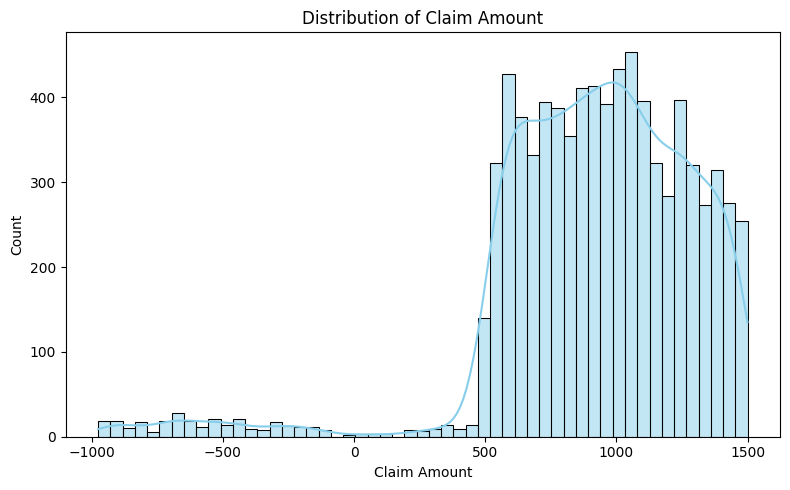

In [ ]:


fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(df['claimamount'], kde=True, ax=ax, color='skyblue')
ax.set_title("Distribution of Claim Amount")
ax.set_xlabel("Claim Amount")
plt.tight_layout()

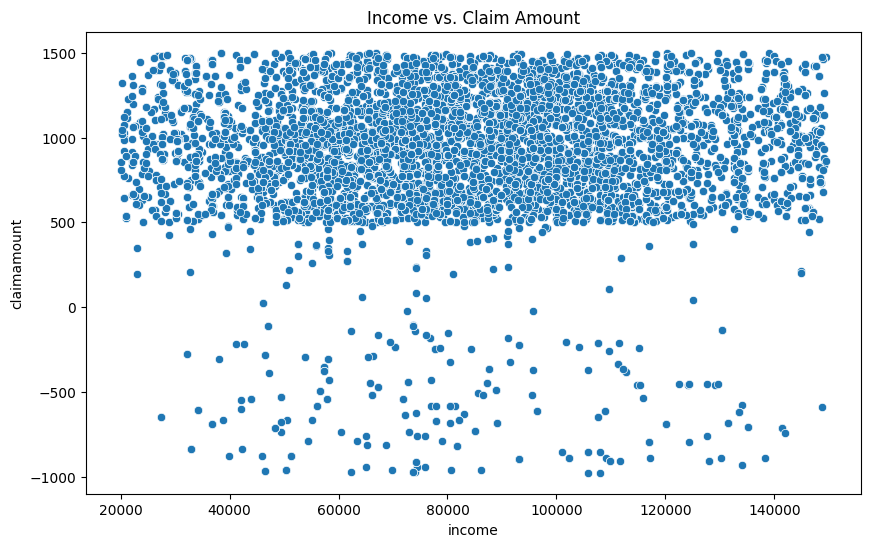

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='income', y='claimamount', data=df, ax=ax)
ax.set_title('Income vs. Claim Amount')
plt.show()

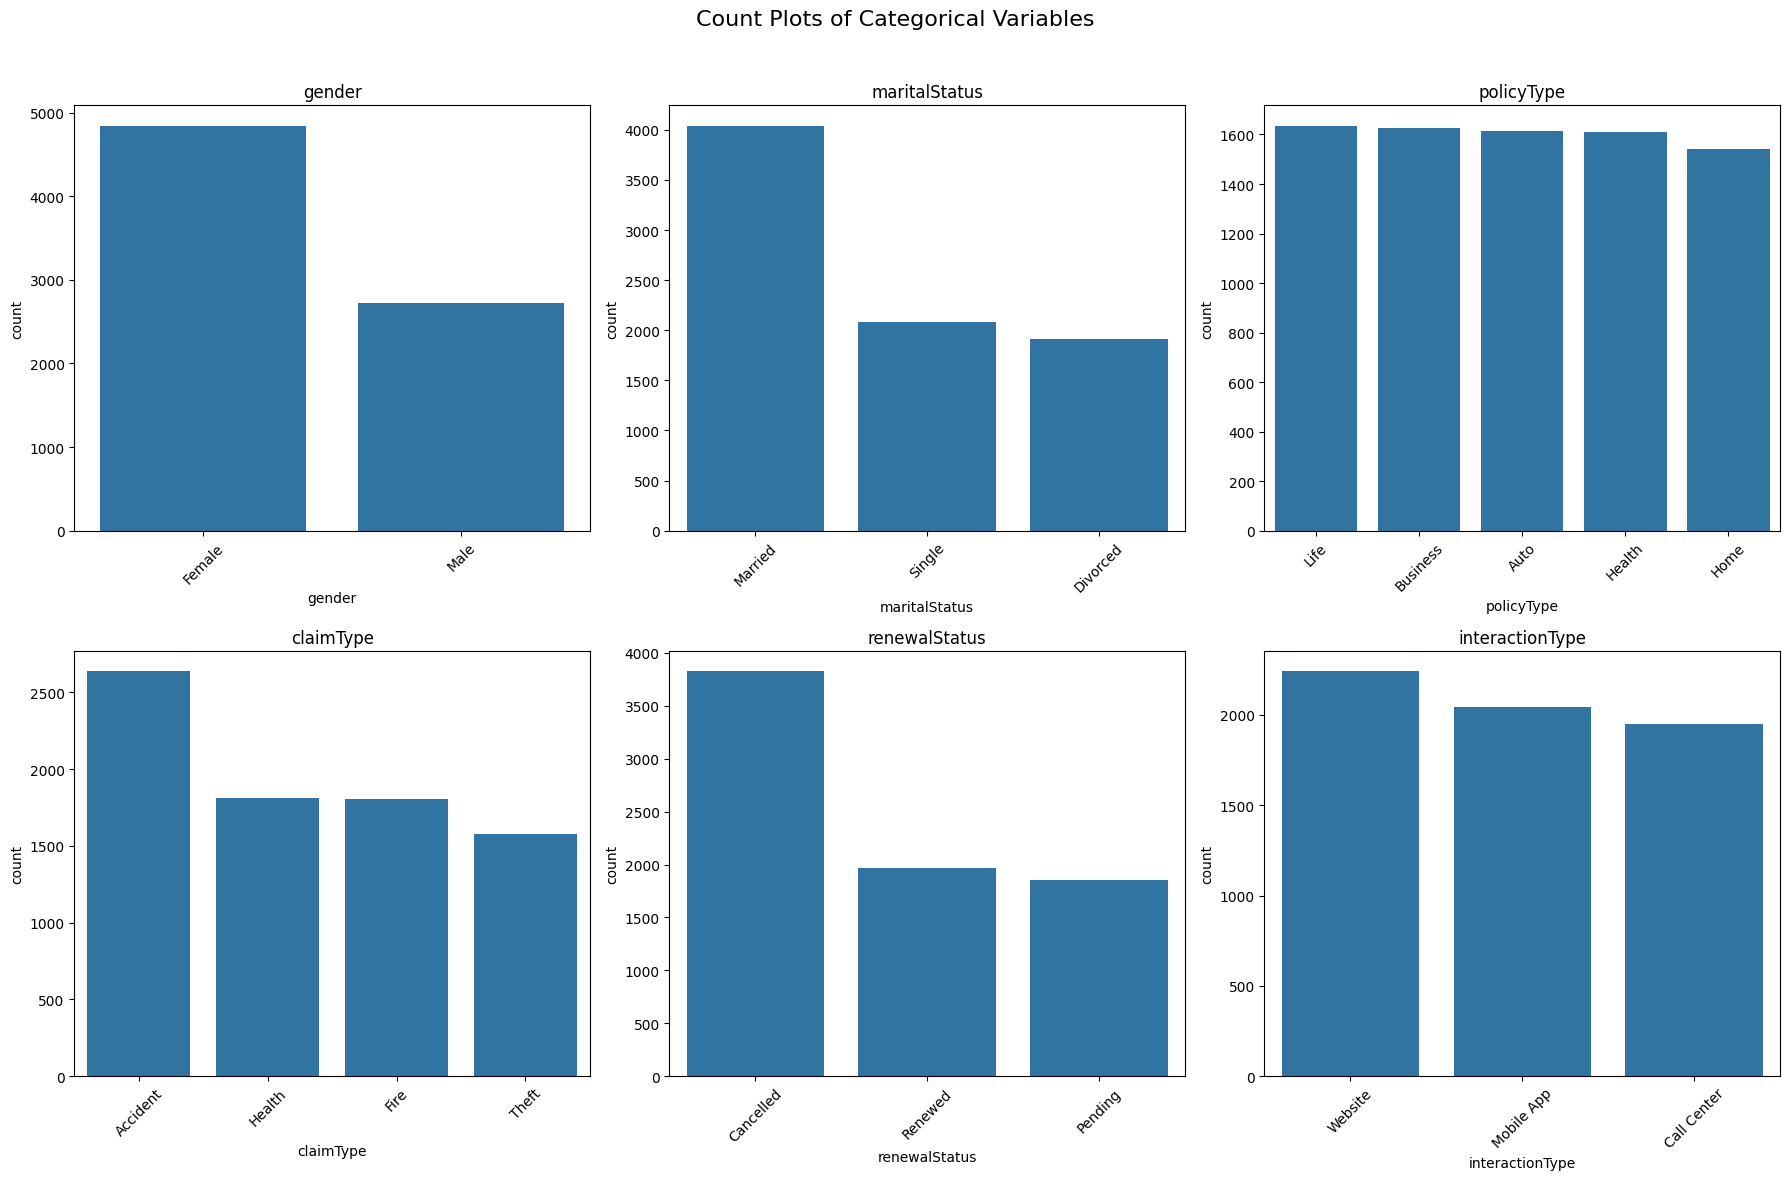

In [38]:
catCols = ['gender','maritalStatus','policyType','claimType','renewalStatus','interactionType']
fig, axes = plt.subplots(2,3, figsize=(18, 12))
fig.suptitle('Count Plots of Categorical Variables', fontsize=16)
for i, col in enumerate(catCols):
    sns.countplot(x=col, data=df, ax=axes[i//3, i%3], order=df[col].value_counts().index)
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

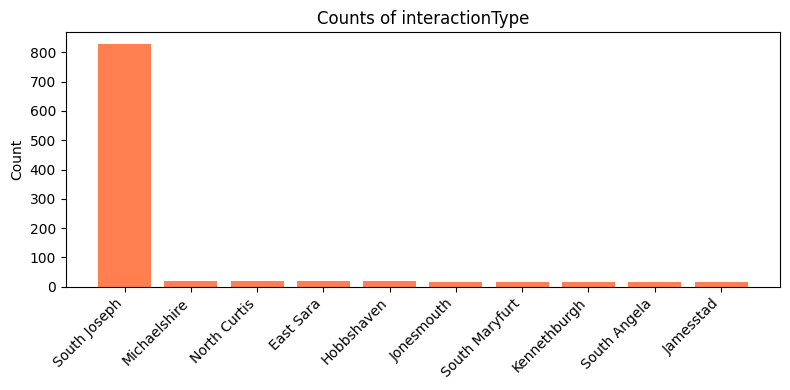

In [ ]:

    counts = df['location'].value_counts().head(10)  
    fig, ax = plt.subplots(figsize=(8,4))
    ax.bar(counts.index.astype(str), counts.values, color='coral')
    ax.set_title(f'Counts of {col}')
    ax.set_ylabel("Count")
    ax.set_xticklabels(counts.index.astype(str), rotation=45, ha='right')
    plt.tight_layout()


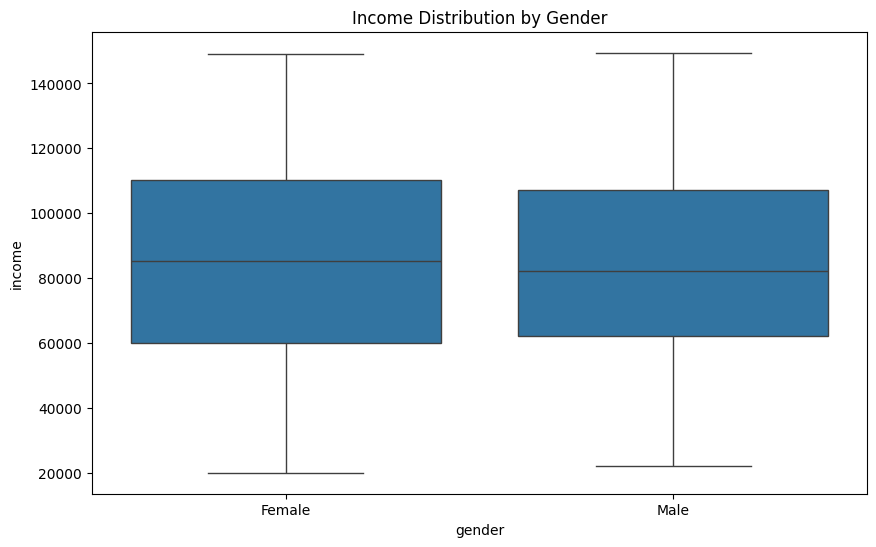

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='gender', y='income', data=df, ax=ax)
ax.set_title('Income Distribution by Gender')
plt.show()

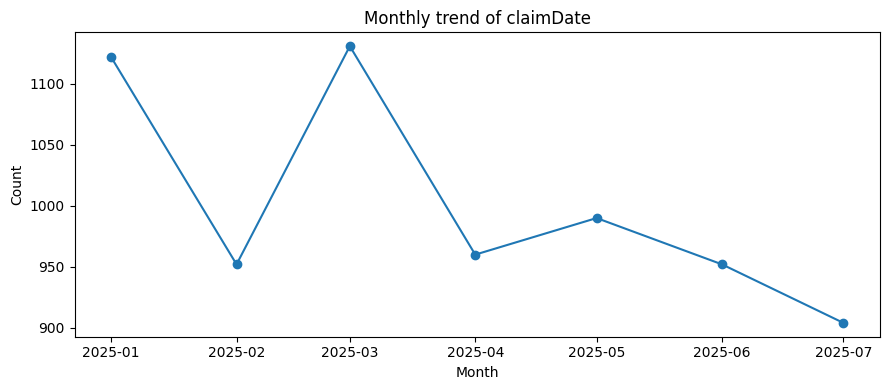

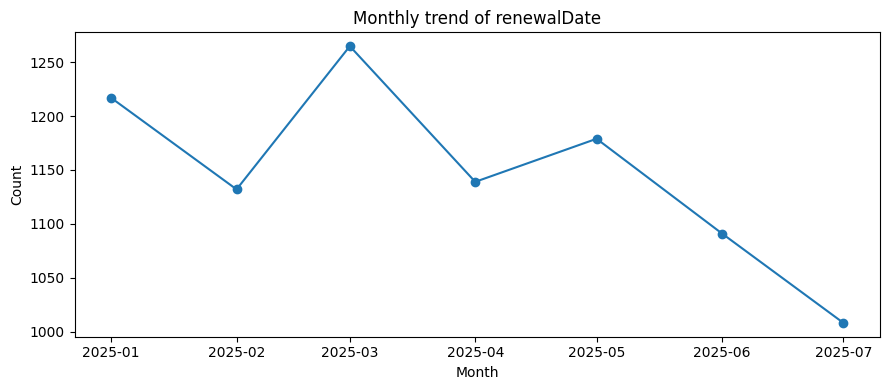

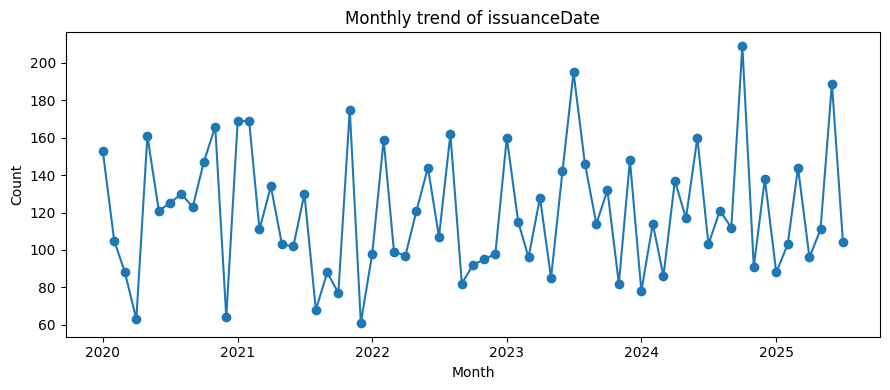

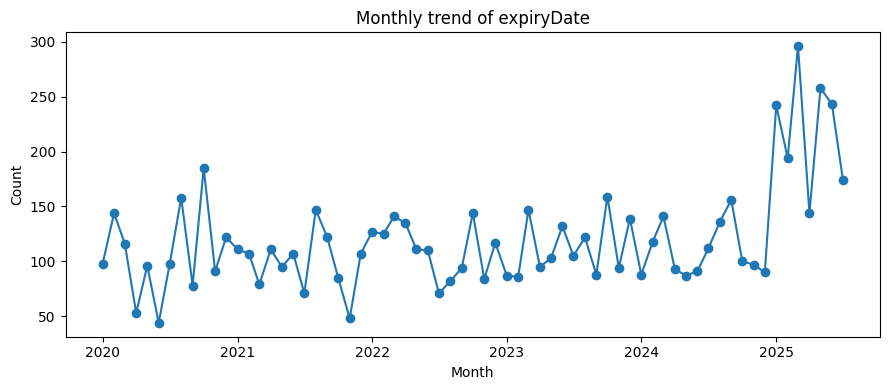

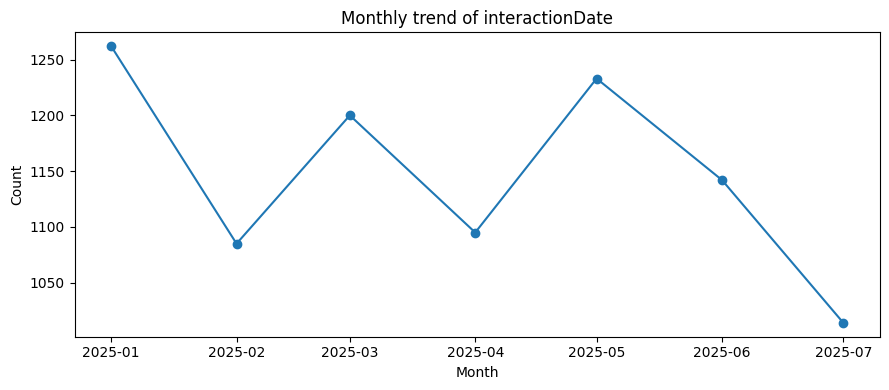

In [24]:
date_cols = ['claimDate','renewalDate','issuanceDate','expiryDate','interactionDate']

for col in date_cols:
    monthly = df[col].dt.to_period('M').value_counts().sort_index()
    fig, ax = plt.subplots(figsize=(9,4))
    ax.plot(monthly.index.to_timestamp(), monthly.values, marker='o')
    ax.set_title(f'Monthly trend of {col}')
    ax.set_xlabel("Month"); ax.set_ylabel("Count")
    plt.tight_layout()


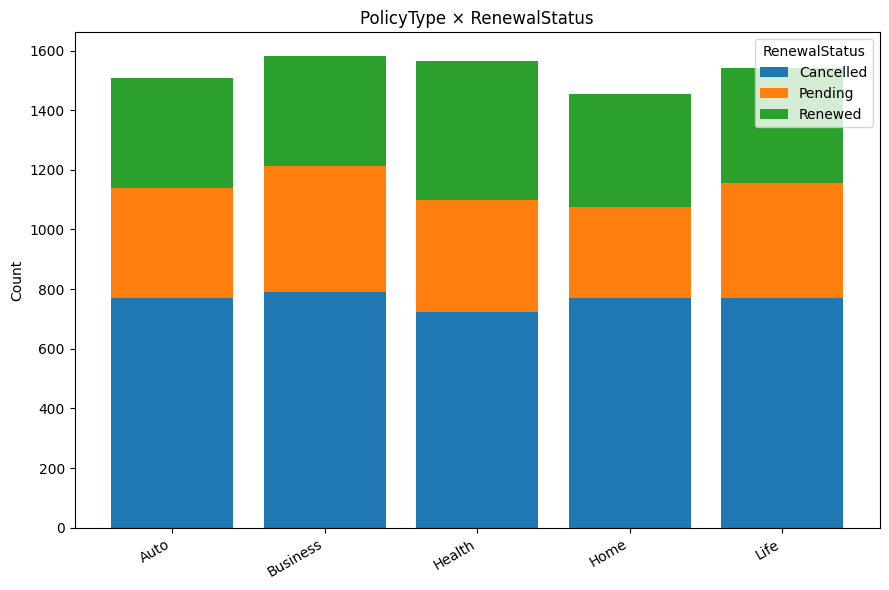

In [26]:
ct = pd.crosstab(df['policyType'], df['renewalStatus'])

fig, ax = plt.subplots(figsize=(9,6))
bottom = np.zeros(len(ct))
for col in ct.columns:
    ax.bar(ct.index, ct[col], bottom=bottom, label=col)
    bottom += ct[col].values
ax.set_title("PolicyType × RenewalStatus")
ax.set_ylabel("Count")
ax.legend(title="RenewalStatus")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()


In [28]:
#quick stats of dataset
print(df.describe(exclude='object'))



                age  gender         income      location maritalStatus  \
count   8031.000000    7565    8031.000000          8031          8031   
unique          NaN       2            NaN          1288             3   
top             NaN  Female            NaN  South Joseph       Married   
freq            NaN    4846            NaN           827          4042   
mean      49.693936     NaN   85234.023893           NaN           NaN   
min       18.000000     NaN   20104.300000           NaN           NaN   
25%       38.000000     NaN   61052.600000           NaN           NaN   
50%       50.000000     NaN   84472.800000           NaN           NaN   
75%       61.000000     NaN  108614.400000           NaN           NaN   
max       80.000000     NaN  149453.000000           NaN           NaN   
std       15.260991     NaN   31348.338772           NaN           NaN   

        claimamount claimType                      claimDate  \
count   8031.000000      7836                  

In [29]:
#handle missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values>0].sort_values(ascending=False)
print(missing_values)



interactionType    1796
claimDate          1020
policyHistory       865
claimHistory        729
gender              466
renewalStatus       379
claimType           195
dtype: int64


In [30]:
#check for duplicated values
print(df.duplicated().any())

False


In [31]:
num_col = df.select_dtypes(include=[np.number]).columns.tolist()
num_col

['age', 'income', 'claimamount', 'renewalPremium', 'premium', 'responseTime']

In [32]:
cat_col = df.select_dtypes(include=[np.object_]).columns.tolist()
cat_col

['policyHistory', 'claimHistory', 'coverageDetails']

In [33]:
from sklearn.impute import SimpleImputer
num_col = df.select_dtypes(include = [np.number])
imputer = SimpleImputer(strategy='median')
df_num = imputer.fit_transform(num_col)
df_num = pd.DataFrame(df_num, columns=num_col.columns)
print(df_num)



       age     income  claimamount  renewalPremium  premium  responseTime
0     34.0   56462.50     1048.770         738.443  561.731     25.666667
1     34.0   56462.50     1048.770         738.443  561.731     25.666667
2     34.0   56462.50      539.576         738.443  561.731     26.500000
3     34.0   56462.50      539.576         738.443  561.731     26.500000
4     31.0   32839.40      965.311         794.892  148.739     26.833333
...    ...        ...          ...             ...      ...           ...
8026  41.0  120113.00     1359.400         234.516  789.233     50.000000
8027  41.0  120113.00     1359.400         234.516  789.233     47.000000
8028  41.0  120113.00     1359.400         234.516  789.233     50.000000
8029  33.0  101583.80     1113.580         311.630  681.518     50.000000
8030  33.0  110963.85     1113.580         311.630  681.518     11.000000

[8031 rows x 6 columns]


In [34]:
# Handle missing categorical values
from sklearn.impute import SimpleImputer
cat_col = df.select_dtypes(include = [object])
imputer = SimpleImputer(strategy='most_frequent')
df_cat = imputer.fit_transform(cat_col)
df_cat = pd.DataFrame(df_cat, columns=cat_col.columns)
print(df_cat)

                                          policyHistory  \
0     Wear level hold century often. Wait same first...   
1     Wear level hold century often. Wait same first...   
2     Wear level hold century often. Wait same first...   
3     Wear level hold century often. Wait same first...   
4     According share well affect sea. Specific noti...   
...                                                 ...   
8026  Within allow attorney energy. Best skin treat ...   
8027  Within allow attorney energy. Best skin treat ...   
8028  Within allow attorney energy. Best skin treat ...   
8029  Administration better compare though dark of. ...   
8030  Administration better compare though dark of. ...   

                                           claimHistory  \
0     Its media single street you. Law party busines...   
1     Its media single street you. Law party busines...   
2     Its media single street you. Law party busines...   
3     Its media single street you. Law party busines...

In [35]:
cat_col = df.select_dtypes(include=["object"]).columns.tolist()

for col in cat_col:
    df[col] = df[col].astype('category')
    df[col] = df[col].str.strip().str.lower()

df




,age,gender,income,location,maritalStatus,policyHistory,claimHistory,claimamount,claimType,claimDate,renewalDate,renewalStatus,renewalPremium,policyType,premium,coverageDetails,issuanceDate,expiryDate,interactionType,interactionDate,responseTime
0,34,Male,56462.50,Port Krista,Divorced,wear level hold century often. wait same first...,its media single street you. law party busines...,1048.770,Health,2025-05-23,2025-03-11,Pending,738.443,Health,561.731,measure yard thought room start himself. why t...,2023-12-05,2021-04-25,Website,2025-01-05,25.666667
1,34,Male,56462.50,Port Krista,Divorced,wear level hold century often. wait same first...,its media single street you. law party busines...,1048.770,Health,2025-05-23,2025-03-11,Pending,738.443,Health,561.731,measure yard thought room start himself. why t...,2023-12-05,2021-04-25,Call Center,2025-07-10,25.666667
2,34,Male,56462.50,Port Krista,Divorced,wear level hold century often. wait same first...,its media single street you. law party busines...,539.576,Health,2025-02-07,2025-03-11,Pending,738.443,Health,561.731,measure yard thought room start himself. why t...,2023-12-05,2021-04-25,Website,2025-01-05,26.500000
3,34,Male,56462.50,Port Krista,Divorced,wear level hold century often. wait same first...,its media single street you. law party busines...,539.576,Health,2025-02-07,2025-03-11,Pending,738.443,Health,561.731,measure yard thought room start himself. why t...,2023-12-05,2021-04-25,Call Center,2025-07-10,26.500000
4,31,Female,32839.40,South Lisaton,Married,according share well affect sea. specific noti...,key agency case serious. indeed offer alone ar...,965.311,Accident,2025-05-13,2025-01-24,Cancelled,794.892,Health,148.739,maintain certain management tonight.tonight no...,2021-08-21,2020-01-12,Website,2025-07-07,26.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026,41,Female,120113.00,Port Greggborough,Married,within allow attorney energy. best skin treat ...,expect in available message scene enjoy. bit m...,1359.400,Health,2025-07-25,2025-02-22,Pending,234.516,Health,789.233,financial degree science continue few onto. po...,2025-03-23,2022-06-19,Call Center,2025-01-28,50.000000
8027,41,Female,120113.00,Port Greggborough,Married,within allow attorney energy. best skin treat ...,expect in available message scene enjoy. bit m...,1359.400,Health,2025-07-25,2025-02-22,Pending,234.516,Health,789.233,financial degree science continue few onto. po...,2025-03-23,2022-06-19,NaN,2025-06-16,47.000000
8028,41,Female,120113.00,Port Greggborough,Married,within allow attorney energy. best skin treat ...,expect in available message scene enjoy. bit m...,1359.400,Health,2025-07-25,2025-02-22,Pending,234.516,Health,789.233,financial degree science continue few onto. po...,2025-03-23,2022-06-19,Mobile App,2025-04-18,50.000000
8029,33,Female,101583.80,New Colleen,Divorced,NaN,set author throw sister people event event. qu...,1113.580,Accident,2025-04-05,2025-06-29,Pending,311.630,Health,681.518,enjoy admit west specific affect. radio sing r...,2020-02-21,2024-09-20,Website,2025-05-29,50.000000


In [36]:
#Detect and handle outliers in num_col using IQR

num_col = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), 0, df[col])

df


,age,gender,income,location,maritalStatus,policyHistory,claimHistory,claimamount,claimType,claimDate,renewalDate,renewalStatus,renewalPremium,policyType,premium,coverageDetails,issuanceDate,expiryDate,interactionType,interactionDate,responseTime
0,34,Male,56462.50,Port Krista,Divorced,wear level hold century often. wait same first...,its media single street you. law party busines...,1048.770,Health,2025-05-23,2025-03-11,Pending,738.443,Health,561.731,measure yard thought room start himself. why t...,2023-12-05,2021-04-25,Website,2025-01-05,25.666667
1,34,Male,56462.50,Port Krista,Divorced,wear level hold century often. wait same first...,its media single street you. law party busines...,1048.770,Health,2025-05-23,2025-03-11,Pending,738.443,Health,561.731,measure yard thought room start himself. why t...,2023-12-05,2021-04-25,Call Center,2025-07-10,25.666667
2,34,Male,56462.50,Port Krista,Divorced,wear level hold century often. wait same first...,its media single street you. law party busines...,539.576,Health,2025-02-07,2025-03-11,Pending,738.443,Health,561.731,measure yard thought room start himself. why t...,2023-12-05,2021-04-25,Website,2025-01-05,26.500000
3,34,Male,56462.50,Port Krista,Divorced,wear level hold century often. wait same first...,its media single street you. law party busines...,539.576,Health,2025-02-07,2025-03-11,Pending,738.443,Health,561.731,measure yard thought room start himself. why t...,2023-12-05,2021-04-25,Call Center,2025-07-10,26.500000
4,31,Female,32839.40,South Lisaton,Married,according share well affect sea. specific noti...,key agency case serious. indeed offer alone ar...,965.311,Accident,2025-05-13,2025-01-24,Cancelled,794.892,Health,148.739,maintain certain management tonight.tonight no...,2021-08-21,2020-01-12,Website,2025-07-07,26.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026,41,Female,120113.00,Port Greggborough,Married,within allow attorney energy. best skin treat ...,expect in available message scene enjoy. bit m...,1359.400,Health,2025-07-25,2025-02-22,Pending,234.516,Health,789.233,financial degree science continue few onto. po...,2025-03-23,2022-06-19,Call Center,2025-01-28,50.000000
8027,41,Female,120113.00,Port Greggborough,Married,within allow attorney energy. best skin treat ...,expect in available message scene enjoy. bit m...,1359.400,Health,2025-07-25,2025-02-22,Pending,234.516,Health,789.233,financial degree science continue few onto. po...,2025-03-23,2022-06-19,NaN,2025-06-16,47.000000
8028,41,Female,120113.00,Port Greggborough,Married,within allow attorney energy. best skin treat ...,expect in available message scene enjoy. bit m...,1359.400,Health,2025-07-25,2025-02-22,Pending,234.516,Health,789.233,financial degree science continue few onto. po...,2025-03-23,2022-06-19,Mobile App,2025-04-18,50.000000
8029,33,Female,101583.80,New Colleen,Divorced,NaN,set author throw sister people event event. qu...,1113.580,Accident,2025-04-05,2025-06-29,Pending,311.630,Health,681.518,enjoy admit west specific affect. radio sing r...,2020-02-21,2024-09-20,Website,2025-05-29,50.000000


In [37]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
df_scale = ['Income', 'Premium']

# Fit and transform
df[df_scale] = scale.fit_transform(df[df_scale])

df


KeyError: "None of [Index(['Income', 'Premium'], dtype='object')] are in the [columns]"

In [ ]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8051 entries, 0 to 8050
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       8051 non-null   int64  
 1   Age              4142 non-null   float64
 2   Gender           5533 non-null   object 
 3   Income           4191 non-null   float64
 4   Location         7251 non-null   object 
 5   MaritalStatus    6021 non-null   object 
 6   PolicyID         8051 non-null   int64  
 7   PolicyType       8051 non-null   object 
 8   Premium          8051 non-null   float64
 9   CoverageDetails  8051 non-null   object 
 10  IssuanceDate     8051 non-null   object 
 11  ExpiryDate       8051 non-null   object 
 12  ClaimAmount      7017 non-null   float64
 13  ClaimType        7017 non-null   object 
 14  ClaimDate        7017 non-null   object 
 15  InteractionType  6073 non-null   object 
 16  InteractionDate  8051 non-null   object 
 17  ResponseTime  

,CustomerID,Age,Gender,Income,Location,MaritalStatus,PolicyID,PolicyType,Premium,CoverageDetails,IssuanceDate,ExpiryDate,ClaimAmount,ClaimType,ClaimDate,InteractionType,InteractionDate,ResponseTime,RenewalStatus,RenewalDate,RenewalPremium
0,1,34.0,male,56462.5,port krista,divorced,1,health,561.731,measure yard thought room start himself. why t...,2023-12-05,2021-04-25,1048.770,health,2025-05-23,website,2025-01-05,NaN,not renewed,2025-03-11,738.443
1,1,34.0,male,56462.5,port krista,divorced,1,health,561.731,measure yard thought room start himself. why t...,2023-12-05,2021-04-25,1048.770,health,2025-05-23,call center,2025-07-10,NaN,not renewed,2025-03-11,738.443
2,1,34.0,male,56462.5,port krista,divorced,1,health,561.731,measure yard thought room start himself. why t...,2023-12-05,2021-04-25,539.576,health,2025-02-07,website,2025-01-05,NaN,not renewed,2025-03-11,738.443
3,1,34.0,male,56462.5,port krista,divorced,1,health,561.731,measure yard thought room start himself. why t...,2023-12-05,2021-04-25,539.576,health,2025-02-07,call center,2025-07-10,NaN,not renewed,2025-03-11,738.443
4,2,31.0,NaN,32839.4,south lisaton,NaN,2,health,148.739,maintain certain management tonight. tonight n...,2021-08-21,2020-01-12,965.311,accident,2025-05-13,NaN,2025-07-07,NaN,renewed,2025-01-24,794.892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8046,1499,NaN,NaN,120113.0,port greggborough,NaN,1499,health,789.233,financial degree science continue few onto. po...,2025-03-23,2022-06-19,1359.400,health,2025-07-25,call center,2025-01-28,50.0,pending,2025-02-22,234.516
8047,1499,NaN,NaN,120113.0,port greggborough,NaN,1499,health,789.233,financial degree science continue few onto. po...,2025-03-23,2022-06-19,1359.400,health,2025-07-25,NaN,2025-06-16,47.0,pending,2025-02-22,234.516
8048,1499,NaN,NaN,120113.0,port greggborough,NaN,1499,health,789.233,financial degree science continue few onto. po...,2025-03-23,2022-06-19,1359.400,health,2025-07-25,mobile app,2025-04-18,50.0,pending,2025-02-22,234.516
8049,1500,33.0,NaN,NaN,new colleen,divorced,1500,health,681.518,enjoy admit west specific affect. radio sing r...,2020-02-21,2024-09-20,1113.580,accident,2025-04-05,website,2025-05-29,50.0,NaN,2025-06-29,311.630


In [ ]:
df['Age'].value_counts().head(5)

Age
54.0    148
60.0    141
65.0    122
43.0    119
31.0    104
Name: count, dtype: int64

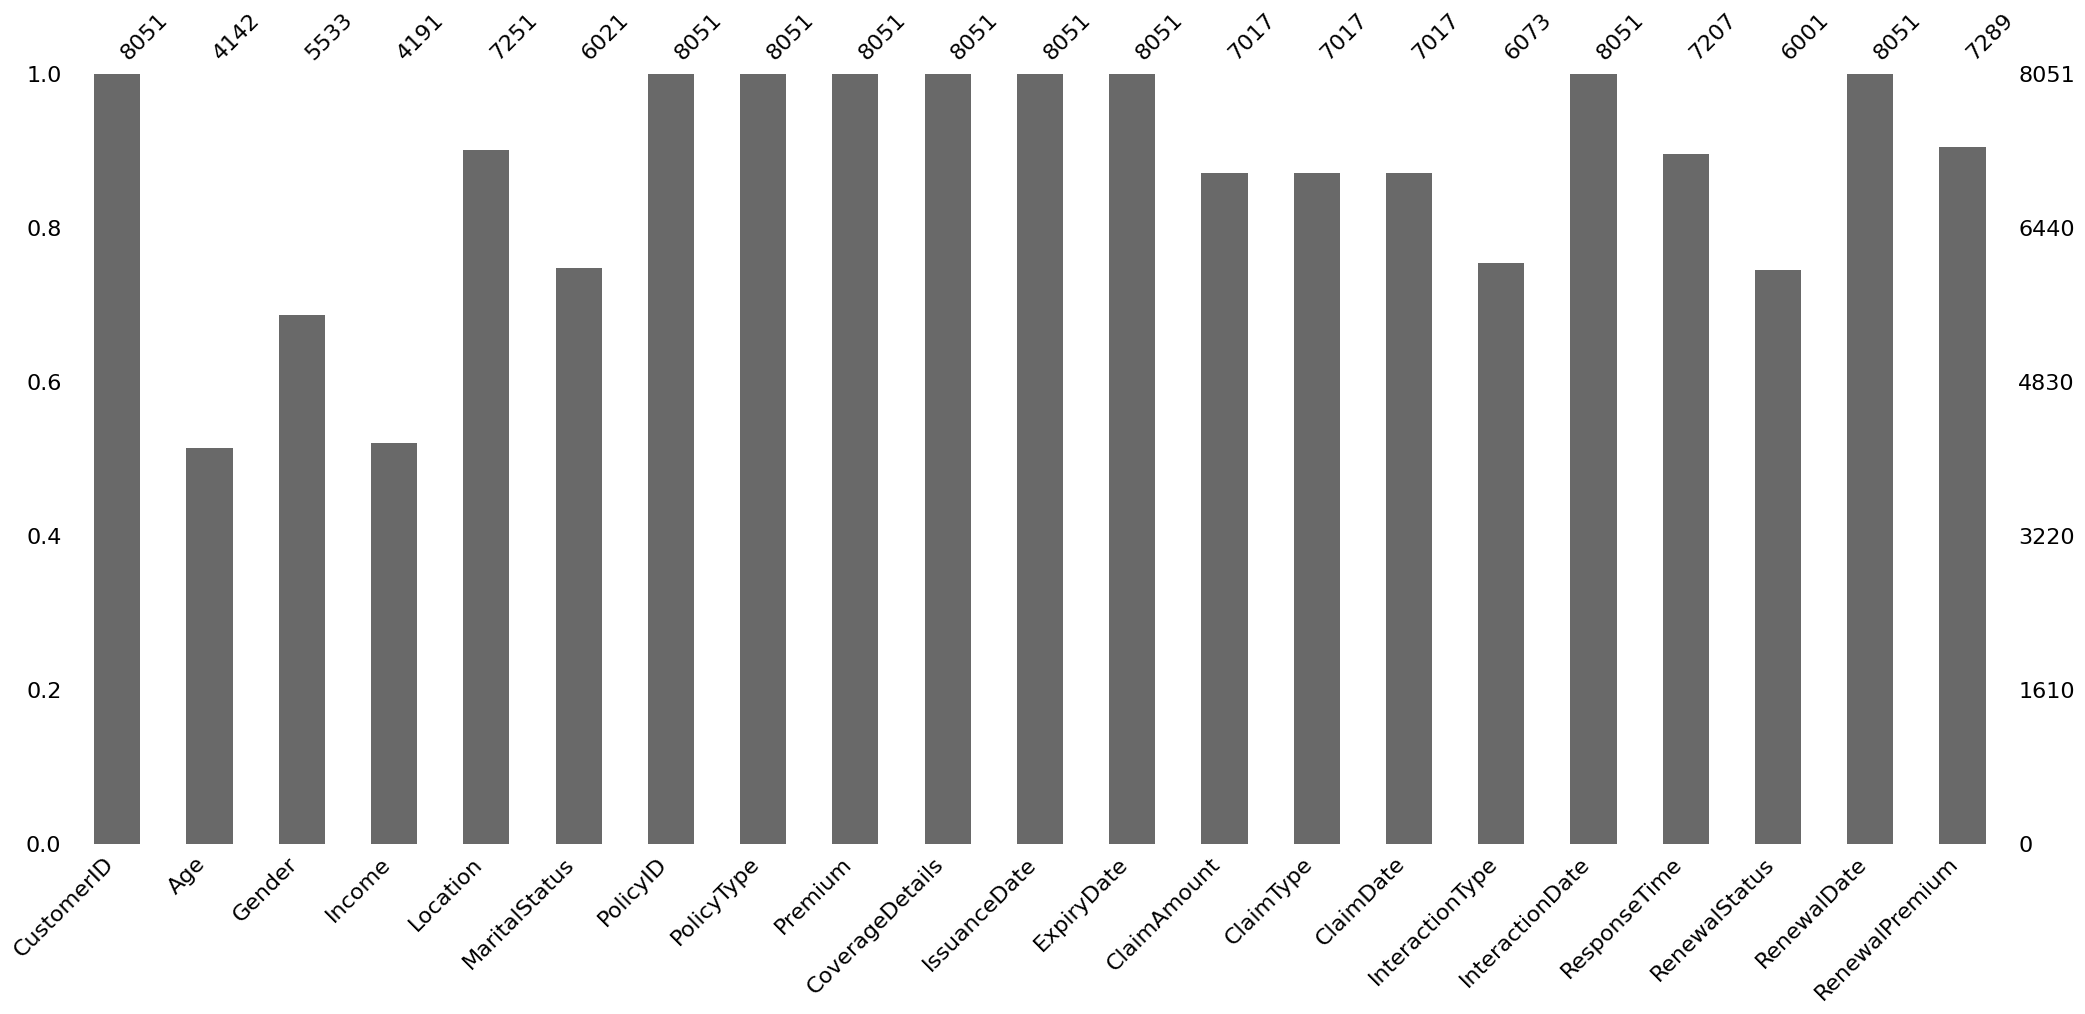

In [ ]:
msno.bar(df)
plt.show()